[IPython Notebook](MESH.ipynb) |  [Python Script](MESH.py)

MESH Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe2
from phoebe2 import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe2.logger(clevel='INFO')

b = phoebe2.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe2.dataset.mesh()
print ps

time: [] d


### time

In [4]:
print ps['time']

Qualifier: time
Description: Observed times
Value: [] d
Constrained by: 
Constrains: None
Related to: None


### enabled

In [5]:
print ps['enabled']

NO PARAMETERS


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to meshes

In [6]:
ps_compute = phoebe2.compute.phoebe()
print ps_compute

enabled@_default: True
dynamics_method: keplerian
ltte: False
stepsize: 0.01
orbiterror: 1e-20
store_mesh: False
mesh_method@_default: marching
delta@_default: 0.1
maxpoints@_default: 100000
distortion_method@_default: roche
gridsize@_default: 40
subdiv_num: 3
eclipse_alg: graham
atm@_default: blackbody
lc_method@_default@_default: numerical
rv_method@_default@_default: flux-weighted
rv_grav@_default@_default: False
etv_method@_default@_default: crossing
etv_tol@_default@_default: 0.0001 d


### mesh_method

In [7]:
print ps_compute['mesh_method']

Qualifier: mesh_method
Description: 
Value: marching
Choices: marching, wd


The 'mesh_method' parameter determines how each component in the system is discretized into its mesh, and has several options:
 * marching (default): this is the new method introduced in PHOEBE 2.  The star is discretized into triangles, with the attempt to make them each of equal-area and nearly equilateral.  Although not as fast as 'wd', this method is more robust and will always form a closed surface (when possible).
 * wd: this is a re-implementation of the Wilson-Devinney style meshing used in PHOEBE 1.0 (legacy), with the stars discretized into trapezoids in strips of latitude (we then split each trapezoid into two triangles).  This is faster, but suffers from gaps between the surface elements, and is mainly meant for testing and comparison with legacy.  See the [WD-Style Meshing Example Script](../examples/wd_mesh) for more details.

### delta

The 'delta' parameter is only relevenat if mesh_method=='marching' (so will not be available unless that is the case).

In [8]:
print ps_compute['delta']

Qualifier: delta
Description: Stepsize for mesh generation via marching method
Value: 0.1
Constrained by: 
Constrains: None
Related to: None
Only relevant if: mesh_method:marching


### gridsize

The 'gridsize' parameter is only relevant if mesh_method=='wd' (so will not be available unless that is the case).

In [9]:
print ps_compute['gridsize']

Qualifier: gridsize
Description: Number of meshpoints for WD method
Value: 40
Only relevant if: mesh_method:wd


### subdiv_num

In [10]:
print ps_compute['subdiv_num']

Qualifier: subdiv_num
Description: Number of subdivisions
Value: 3


The 'subdiv_num' parameter controls how many times triangles along the eclipse-edge are subdivided.  Increasing this number can significantly increase the computation-time necessary to compute meshes during eclipses, but also increases the resolution of the mesh and therefore the precision of any integrated values (ie. fluxes or radial velocities).

Synthetics
------------------

In [11]:
b.add_dataset('MESH', time=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

In [12]:
b.add_compute()

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

In [13]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  

<ParameterSet: 48 parameters | components: primary, secondary>

In [14]:
b['MESH@model'].twigs

['time@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@x@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@y@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@z@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@pot@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@rpole@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@volume@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@vx@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@vy@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@vz@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@areas@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@volumes@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@vertices@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@normals@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@nx@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@ny@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@nz@primary@mesh01@phoebe01@tmpmodel@MESH@model',
 '0.0@cosbeta@primary@mesh01@phoebe01@tmpmo

### Per-Mesh Parameters

In [15]:
print b['time@primary@mesh01@model']

Qualifier: time
Description: Synthetic times
Value: [ 0.] d
Constrained by: 
Constrains: None
Related to: None


### Per-Time Parameters

In [16]:
print b['volume@primary@mesh01@model']

Qualifier: volume
Description: Volume of the stellar surface
Value: 4.20970624288 solRad3
Constrained by: 
Constrains: None
Related to: None


In [17]:
print b['rpole@primary@mesh01@model']

Qualifier: rpole
Description: Polar radius of the stellar surface
Value: 1.0 solRad
Constrained by: 
Constrains: None
Related to: None


In [18]:
print b['pot@primary@mesh01@model']

Qualifier: pot
Description: Equipotential of the stellar surface
Value: 8.99227787671
Constrained by: 
Constrains: None
Related to: None


### Per-Element Parameters

In [19]:
print b['vertices@primary@mesh01@model']

Qualifier: vertices
Description: Vertices of triangles
Value: [[  3.06450135e-16   3.06450135e-16  -5.00471051e+00 ...,
   -4.97510994e-02  -8.61696939e-02  -4.99973304e+00]
 [  3.06450135e-16   3.06450135e-16  -5.00471051e+00 ...,
    4.97510994e-02  -8.61696939e-02  -4.99973304e+00]
 [  3.06450135e-16   3.06450135e-16  -5.00471051e+00 ...,
    9.95036513e-02   2.93960805e-16  -4.99974757e+00]
 ..., 
 [ -2.56649273e-01  -9.64486206e-01  -3.99719873e+00 ...,
   -2.56654881e-01  -9.64733231e-01  -4.01232811e+00]
 [  2.71211575e-01  -9.60511741e-01  -3.98199659e+00 ...,
    2.61255052e-01  -9.63479772e-01  -3.98886381e+00]
 [  3.39368087e-01  -9.38805138e-01  -4.00077095e+00 ...,
    3.44902335e-01  -9.36938235e-01  -4.01496738e+00]] solRad
Constrained by: 
Constrains: None
Related to: None


In [20]:
print b['x@primary@mesh01@model']

Qualifier: x
Description: X coordinate of center of triangles
Value: [ -4.98341854e-02   2.94764247e-16   4.98341854e-02 ...,
  -2.52943408e-01   2.69737483e-01   3.45122061e-01] solRad
Constrained by: 
Constrains: None
Related to: None


In [21]:
print b['r@primary@mesh01@model']

Qualifier: r
Description: Distance of each triangle from center of mass
Value: [ 1.00470104  1.00469611  1.00470104 ...,  0.99813048  0.99808164
  0.99834634] solRad
Constrained by: 
Constrains: None
Related to: None


In [22]:
print b['r_proj@primary@mesh01@model']

Qualifier: r_proj
Description: Projected distance (on plane of sky) of each triangle from center of mass
Value: [ 0.05754322  0.05754222  0.05754322 ...,  0.99810928  0.99802122
  0.99832371] solRad
Constrained by: 
Constrains: None
Related to: None


In [23]:
print b['cosbeta@primary@mesh01@model']

Qualifier: cosbeta
Description: 
Value: [] solRad
Constrained by: 
Constrains: None
Related to: None


In [24]:
print b['normals@primary@mesh01@model']

Qualifier: normals
Description: Normals of triangles
Value: [[ -4.98356308e-02  -2.88862198e-02  -9.98339620e-01]
 [  4.95457681e-17  -5.77721432e-02  -9.98329795e-01]
 [  4.98356308e-02  -2.88862198e-02  -9.98339620e-01]
 ..., 
 [ -2.37753906e-01  -9.71323358e-01   2.00379212e-03]
 [  2.93346360e-01  -9.55998541e-01   3.83455847e-03]
 [  3.50940057e-01  -9.36316633e-01   1.23385659e-02]]
Constrained by: 
Constrains: None
Related to: None


In [25]:
print b['nx@primary@mesh01@model']

Qualifier: nx
Description: X component of normals
Value: [ -4.98356308e-02   4.95457681e-17   4.98356308e-02 ...,
  -2.37753906e-01   2.93346360e-01   3.50940057e-01]
Constrained by: 
Constrains: None
Related to: None


In [26]:
print b['mu@primary@mesh01@model']

Qualifier: mu
Description: Mu
Value: [-0.99833962 -0.99832979 -0.99833962 ...,  0.00200379  0.00383456
  0.01233857]
Constrained by: 
Constrains: None
Related to: None


In [27]:
print b['vx@primary@mesh01@model']

Qualifier: vx
Description: X velocity of center of triangles
Value: [-10.47836713 -10.4783569  -10.47836713 ...,  -8.37410225
  -8.37023208  -8.35225464] solRad / d
Constrained by: 
Constrains: None
Related to: None


In [28]:
print b['areas@primary@mesh01@model']

Qualifier: areas
Description: Area of triangles
Value: [  4.29422476e-03   4.29418317e-03   4.29422476e-03 ...,
   8.65717734e-05   9.37976431e-05   7.78398804e-05] solRad3
Constrained by: 
Constrains: None
Related to: None


In [29]:
print b['volumes@primary@mesh01@model']

Qualifier: volumes
Description: Volume of triangles
Value: [  7.15426356e-03   7.15413086e-03   7.15426356e-03 ...,
   2.85672046e-05   3.07165114e-05   2.46180240e-05] solRad3
Constrained by: 
Constrains: None
Related to: None


In [30]:
print b['logg@primary@mesh01@model']

Qualifier: logg
Description: Local surface gravity
Value: [ 4.01251016  4.01251876  4.01251016 ...,  4.02038848  4.0202893
  4.0201685 ]
Constrained by: 
Constrains: None
Related to: None


In [31]:
print b['teff@primary@mesh01@model']

Qualifier: teff
Description: Local effective temperature
Value: [  9992.42568035   9992.44151254   9992.42568035 ...,
  10006.93762577  10006.75481009  10006.53212714] K
Constrained by: 
Constrains: None
Related to: None


In [32]:
print b['visibility@primary@mesh01@model']

Qualifier: visibility
Description: Visiblity of triangles (1=visible, 0.5=partial, 0=hidden)
Value: [ 0.   0.   0.  ...,  0.5  0.   0. ]
Constrained by: 
Constrains: None
Related to: None


Plotting
---------------

By default, MESH datasets plot as y vx x (plane of sky) of just the surface elements, taken from the vertices vectors.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


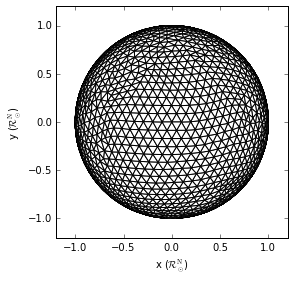

In [33]:
axs, artists = b['MESH@model'].plot()

Any of the 1-D fields (ie not vertices or normals) or matplotlib-recognized colornames can be used to color either the faces or edges of the triangles.  Passing none for edgecolor or facecolor turns off the coloring (you may want to set edgecolor=None if setting facecolor to disable the black outline).

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


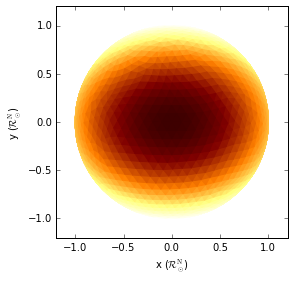

In [34]:
axs, artists = b['MESH@model'].plot(facecolor='teff', edgecolor=None)

Alternatively, if you provide simple 1-D fields to plot, a 2D x-y plot will be created using the values from each element (always for a single time - if meshes exist for multiple times in the model, you must provide a single time either in the twig or as an argument to plot).

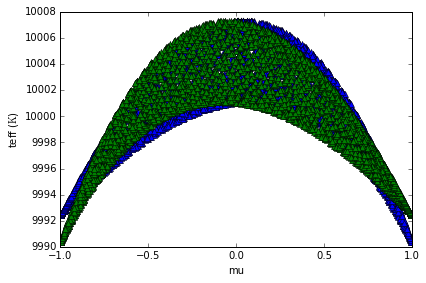

In [35]:
axs, artists = b['MESH@model'].plot(time=0.0, x='mu', y='teff')

The exception to needing to provide a time is for the per-time parameters mentioned above.  For these, time can be the x-array (not very exciting in this case with only a single time).

For more examples see the following:
- [Passband Luminosity Tutorial](pblum)

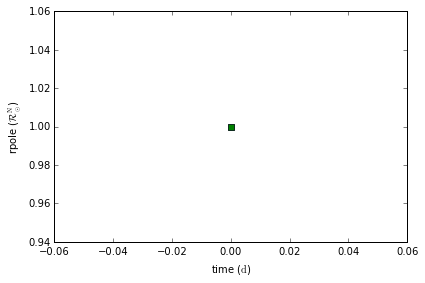

In [36]:
axs, artists = b['MESH@model'].plot(x='time', y='rpole', marker='s')